In [158]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inflation-ontario-during-covid-19/cpi_data.csv
/kaggle/input/migration-in-canada-during-covid/migrations.csv


# **Analysis of Potential Migration Patterns of GTA Residents During a Hypothetical Pandemic in 2025** #

## **Introduction** ##
*  The analysis aims to explore potential migration patterns of residents from 1. the Greater Toronto Area (GTA) in the event of a pandemic in 2025.
*  Factors influencing migration include rising costs of living, inflation, and historical migration trends.
*  CPI = Comsumer Price Index which is the rate at which inflation occurs in a particular region over time
*  GTA = Greater Toronto which includes  the City of Toronto, along with the regional municipalities of Peel (Mississauga, Brampton, Caledon), York (Vaughan, Markham, Richmond Hill, Newmarket, Aurora, East Gwillimbury, King, Whitchurch-Stouffville, Georgina), Durham (Pickering, Ajax, Whitby, Oshawa, Clarington, Uxbridge, Scugog, Brock), and Halton (Oakville, Burlington, Milton, Halton Hills).

### Data Sources ###
Population Estimates:

Accessed from Statistics Canada.
Focus on population estimates by age and sex for the years 2020 to 2024.
Relevant link: Population Estimates, by Age and Sex.
Inflation Data:

Consumer Price Index (CPI) data for various cities, including the GTA.
Relevant link: Consumer Price Index, monthly, not seasonally adjusted.

Interprovincial migration estimates to analyze past trends.
Relevant link: Interprovincial Migration Estimates.

DataSource: StatsCanada.com

### Step 2: Load the Data ###

In [159]:
#loading the datasets#
cpi_df = pd.read_csv('/kaggle/input/inflation-ontario-during-covid-19/cpi_data.csv')
migration_df = pd.read_csv('/kaggle/input/migration-in-canada-during-covid/migrations.csv')

In [160]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geography       15 non-null     object 
 1   Product Group   15 non-null     object 
 2   January 2020    15 non-null     float64
 3   February 2020   15 non-null     float64
 4   March 2020      15 non-null     float64
 5   April 2020      15 non-null     float64
 6   May 2020        15 non-null     float64
 7   June 2020       15 non-null     float64
 8   July 2020       15 non-null     float64
 9   August 2020     15 non-null     float64
 10  September 2020  15 non-null     float64
 11  October 2020    15 non-null     float64
 12  November 2020   15 non-null     float64
 13  December 2020   15 non-null     float64
 14  January 2021    15 non-null     float64
 15  February 2021   15 non-null     float64
 16  March 2021      15 non-null     float64
 17  April 2021      15 non-null     float

In [161]:
cpi_df.head()

,Geography,Product Group,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020,July 2020,August 2020,...,August 2023,September 2023,October 2023,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024
0,Ontario,All-items,138.0,138.7,137.9,137.3,137.5,138.6,138.8,138.6,...,159.9,159.7,160.3,160.6,160.0,159.9,160.2,161.4,162.2,163.2
1,Ontario,Food,155.3,154.4,154.5,156.4,156.1,156.6,157.0,155.9,...,187.0,186.7,186.5,187.9,187.8,189.5,189.3,189.4,189.2,190.7
2,Ontario,Shelter,149.0,149.3,149.3,148.4,148.0,149.7,149.5,150.2,...,177.2,177.7,179.8,180.2,181.3,181.8,182.5,183.4,183.7,185.2
3,Ontario,"Household operations, furnishings and equipment",124.3,125.0,125.3,126.0,125.6,125.4,125.9,125.4,...,135.5,134.8,135.2,134.8,133.9,134.2,132.9,132.7,134.4,134.7
4,Ontario,Clothing and footwear,90.7,92.4,93.9,89.3,88.0,88.5,88.8,89.7,...,93.9,95.0,96.0,96.1,94.5,92.5,91.1,92.4,93.6,92.6


In [162]:
migration_df.head()

,Geography,2020,2021,2022,2023,2024
0,Canada,"38,028,638","38,239,864","38,935,934","40,083,484","41,288,599"
1,Newfoundland and Labrador,"526,884","527,056","531,308","538,907","545,247"
2,Prince Edward Island,"159,193","162,133","167,213","173,713","178,550"
3,Nova Scotia,"989,168","999,908","1,025,263","1,056,486","1,076,374"
4,New Brunswick,"783,432","790,802","809,264","832,190","854,355"


## Step 3: Data Cleaning and Preparation ##
### Ensure that the data types are correct and that there are no missing values. ###

In [163]:
# Check for missing values
print(cpi_df.isnull().sum())
print(migration_df.isnull().sum())

Geography         0
Product Group     0
January 2020      0
February 2020     0
March 2020        0
April 2020        0
May 2020          0
June 2020         0
July 2020         0
August 2020       0
September 2020    0
October 2020      0
November 2020     0
December 2020     0
January 2021      0
February 2021     0
March 2021        0
April 2021        0
May 2021          0
June 2021         0
July 2021         0
August 2021       0
September 2021    0
October 2021      0
November 2021     0
December 2021     0
January 2022      0
February 2022     0
March 2022        0
April 2022        0
May 2022          0
June 2022         0
July 2022         0
August 2022       0
September 2022    0
October 2022      0
November 2022     0
December 2022     0
January 2023      0
February 2023     0
March 2023        0
April 2023        0
May 2023          0
June 2023         0
July 2023         0
August 2023       0
September 2023    0
October 2023      0
November 2023     0
December 2023     0


In [164]:
# Ensure the columns are treated as strings first
migration_df['2020'] = migration_df['2020'].astype(str).str.replace(',', '').astype(int)
migration_df['2021'] = migration_df['2021'].astype(str).str.replace(',', '').astype(int)
migration_df['2022'] = migration_df['2022'].astype(str).str.replace(',', '').astype(int)
migration_df['2023'] = migration_df['2023'].astype(str).str.replace(',', '').astype(int)
migration_df['2024'] = migration_df['2024'].astype(str).str.replace(',', '').astype(int)

In [165]:
#check the dtypes of the values
print(migration_df.dtypes)
print(cpi_df.dtypes)

Geography    object
2020          int64
2021          int64
2022          int64
2023          int64
2024          int64
dtype: object
Geography          object
Product Group      object
January 2020      float64
February 2020     float64
March 2020        float64
April 2020        float64
May 2020          float64
June 2020         float64
July 2020         float64
August 2020       float64
September 2020    float64
October 2020      float64
November 2020     float64
December 2020     float64
January 2021      float64
February 2021     float64
March 2021        float64
April 2021        float64
May 2021          float64
June 2021         float64
July 2021         float64
August 2021       float64
September 2021    float64
October 2021      float64
November 2021     float64
December 2021     float64
January 2022      float64
February 2022     float64
March 2022        float64
April 2022        float64
May 2022          float64
June 2022         float64
July 2022         float64
August 2

## Step 4: Analysis Inflation Data ##
### Calculate the average inflation rate for different regions and identify which regions have lower inflation compared to the GTA. ###

In [166]:
# Calculate average CPI for GTA (Ontario)
gta_cpi_row = cpi_df[(cpi_df['Geography'] == 'Ontario') & (cpi_df['Product Group'] == 'All-items')]
gta_cpi = gta_cpi_row.select_dtypes(include='number').mean(axis=1).iloc[0]  # Get single float

# Calculate average CPI for each row
cpi_df['Average CPI'] = cpi_df.select_dtypes(include='number').mean(axis=1)

# Identify rows with lower CPI than GTA
lower_cpi_regions = cpi_df[cpi_df['Average CPI'] < gta_cpi]

# Display result
print(lower_cpi_regions[['Product Group', 'Average CPI']])


                                      Product Group  Average CPI
3   Household operations, furnishings and equipment   130.915094
4                             Clothing and footwear    91.847170
7                          Health and personal care   138.784906
8                 Recreation, education and reading   122.069811
10              All-items excluding food and energy   142.781132
11                       All-items excluding energy   147.198113
13                                            Goods   132.350943


**The above shows that other regions have significantly lower CPI than GTA**

## Step 5: Analysis Population Growth ##
### Identify cities with significant population growth, which may indicate attractiveness for GTA residents. ###

In [167]:
# Calculate population growth from 2020 to 2024
migration_df['Growth'] = migration_df['2024'] - migration_df['2020']

# Sort by growth
growing_cities = migration_df.sort_values(by='Growth', ascending=False)
print(growing_cities[['Geography', 'Growth']])

                          Geography   Growth
0                            Canada  3259961
6   Ontario by Public Health Unit 7  1362305
17                     Peer group D   945858
16                     Peer group C   541329
22                     Peer group I   528895
10                 British Columbia   522329
20                     Peer group G   506488
5                            Quebec   504949
9                           Alberta   481228
21                     Peer group H   285847
19                     Peer group F   275141
18                     Peer group E   120746
7                          Manitoba   114169
3                       Nova Scotia    87206
8                      Saskatchewan    72479
4                     New Brunswick    70923
15                     Peer group B    52139
2              Prince Edward Island    19357
1         Newfoundland and Labrador    18363
11                            Yukon     4746
14                     Peer group A     3518
13        

### **As we do not know what the peer groups mean as they are meant to be used for educational purposes we will remove them and do the analysis again** ###

In [168]:
# Filter out rows that contain 'Peer group' in the 'Geography' column
cleaned_migration_df = migration_df[~migration_df['Geography'].str.contains('Peer group')]

# Check the cleaned data
print(cleaned_migration_df[['Geography', 'Growth']])


                          Geography   Growth
0                            Canada  3259961
1         Newfoundland and Labrador    18363
2              Prince Edward Island    19357
3                       Nova Scotia    87206
4                     New Brunswick    70923
5                            Quebec   504949
6   Ontario by Public Health Unit 7  1362305
7                          Manitoba   114169
8                      Saskatchewan    72479
9                           Alberta   481228
10                 British Columbia   522329
11                            Yukon     4746
12            Northwest Territories      227
13                          Nunavut     1680


In [169]:
# Calculate population growth from 2020 to 2024
cleaned_migration_df['Growth'] = cleaned_migration_df['2024'] - migration_df['2020']

# Sort by growth
growing_cities =cleaned_migration_df.sort_values(by='Growth', ascending=False)
print(growing_cities[['Geography', 'Growth']])

                          Geography     Growth
0                            Canada  3259961.0
6   Ontario by Public Health Unit 7  1362305.0
10                 British Columbia   522329.0
5                            Quebec   504949.0
9                           Alberta   481228.0
7                          Manitoba   114169.0
3                       Nova Scotia    87206.0
8                      Saskatchewan    72479.0
4                     New Brunswick    70923.0
2              Prince Edward Island    19357.0
1         Newfoundland and Labrador    18363.0
11                            Yukon     4746.0
13                          Nunavut     1680.0
12            Northwest Territories      227.0


In [170]:
# Calculate population growth
cleaned_migration_df['Growth'] = cleaned_migration_df['2024'] - cleaned_migration_df['2020']

# Sort by growth
growing_provinces = cleaned_migration_df.sort_values(by='Growth', ascending=False)

# Display results
print(growing_provinces[['Geography', 'Growth']])


                          Geography   Growth
0                            Canada  3259961
6   Ontario by Public Health Unit 7  1362305
10                 British Columbia   522329
5                            Quebec   504949
9                           Alberta   481228
7                          Manitoba   114169
3                       Nova Scotia    87206
8                      Saskatchewan    72479
4                     New Brunswick    70923
2              Prince Edward Island    19357
1         Newfoundland and Labrador    18363
11                            Yukon     4746
13                          Nunavut     1680
12            Northwest Territories      227


This table shows the regions in which population grew the most in the last few years like British Columbia and Quebec, this shows that more people moved to those areas in that duration of time

# Visualisation

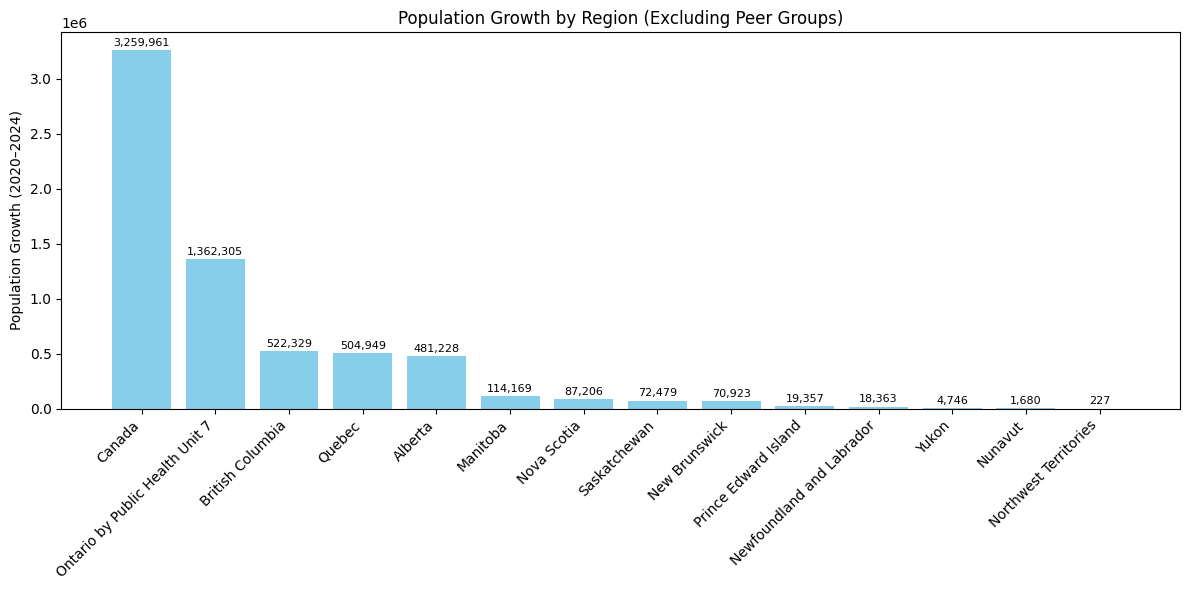

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

# Your real migration data
data = {
    'Geography': [
        'Canada', 'Ontario by Public Health Unit 7', 'Peer group D', 'Peer group C', 'Peer group I',
        'British Columbia', 'Peer group G', 'Quebec', 'Alberta', 'Peer group H', 'Peer group F',
        'Peer group E', 'Manitoba', 'Nova Scotia', 'Saskatchewan', 'New Brunswick', 'Peer group B',
        'Prince Edward Island', 'Newfoundland and Labrador', 'Yukon', 'Peer group A', 'Nunavut',
        'Northwest Territories'
    ],
    'Growth': [
        3259961, 1362305, 945858, 541329, 528895, 522329, 506488, 504949, 481228, 285847,
        275141, 120746, 114169, 87206, 72479, 70923, 52139, 19357, 18363, 4746, 3518, 1680, 227
    ]
}

# Create DataFrame
migration_df = pd.DataFrame(data)

# Filter out Peer Groups (entries with 'Peer group' in Geography)
filtered_df = migration_df[~migration_df['Geography'].str.contains('Peer group')]

# Sort by growth for better visualization
filtered_df = filtered_df.sort_values(by='Growth', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered_df['Geography'], filtered_df['Growth'], color='skyblue')

# Annotate each bar with the growth value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20000, f'{height:,}', ha='center', va='bottom', fontsize=8)

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.ylabel('Population Growth (2020–2024)')
plt.title('Population Growth by Region (Excluding Peer Groups)')
plt.tight_layout()

plt.show()


From 2020 to 2024, the average cost of living in Ontario—measured using the Consumer Price Index (CPI)—was around **130.91**. This number shows how much prices have increased for things like food, housing, and transportation. During the same time, population data shows that many people moved to other parts of Canada. For example, **Alberta** grew by **481,228** people and **British Columbia** by **522,329**. Even though we only have CPI data for Ontario as a whole and not for specific cities like Toronto, the information still suggests that some people may have moved out of Ontario to find more affordable places to live or better job opportunities.
